1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [11]:
# Importando Librerias de regresion logistic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
df = pd.read_csv('Titanic-Dataset.csv')
df.head(297)


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
292,0,2,male,36.0
293,0,3,female,24.0
294,0,3,male,24.0
295,0,1,male,NaN


Importamos las diferentes librerias y el data set dataframe que nos ayudaran a realizar el arbol de decicsión e imprimimos el dataframe con 50 registros o filas llamado conjutoDatos para desarrollar la actividad.

In [12]:
#imprimimos la informacion de las columnas del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Imprimimos la información del dataframe para saber si hay datos faltantes

In [13]:
#Imprimimos la variable Objetivo para su analisis
df[["Age"]]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [14]:
df['Sex'] =df['Sex'].astype('category').cat.codes
df

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
886,0,2,1,27.0
887,1,1,0,19.0
888,0,3,0,NaN
889,1,1,1,26.0


In [15]:
df=df.fillna(df.mean())
df

,Survived,Pclass,Sex,Age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,29.699118
889,1,1,1,26.000000


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Text(0.5, 1.0, 'Datos atipico')

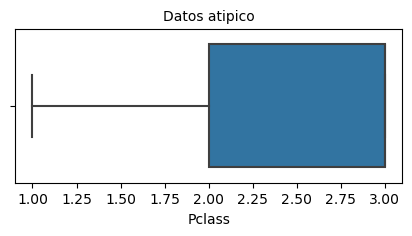

In [16]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = df["Pclass"])
mplot.title("Datos atipico", fontsize = 10)

La grafica muetra que exsten datos atipicos pero esos datos pertenecen a la ausencia de dolores a nivele de torax y una persona puede tener o no dolor.

Text(0.5, 1.0, ' Datos atipicos')

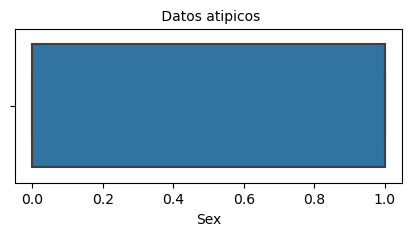

In [17]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = df["Sex"])
mplot.title(" Datos atipicos", fontsize = 10)

Graficamos las variables predictoras de manera que podamos saber si existen datos atipicos o erroneos

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [19]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Contamos e imprimimos la cantidad de valores 0 como 1  en la columna condition columna objetivo del analisis.

Graficamos la variable Objetivo y no encontramos datos atpicos.

Graficamos la variable presion arterial importante para el analisis de enfermedad cardiaca y vemos datos atipicos o erroneos entonces nos disponemos a identificarlos.

In [ ]:
df.info()

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [ ]:

X = df.drop('Survived',axis=1)
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [ ]:
print(X_train)

In [ ]:
print(Y_train)

5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [ ]:
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression(solver = "liblinear")
regresion_logistica.fit(X_train, Y_train)
prediccion = regresion_logistica.predict(X_test)

In [ ]:
print(Y_test)

In [ ]:
print(prediccion)

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [ ]:
print(classification_report(Y_test, prediccion))

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [ ]:
matriz_confusion = confusion_matrix(Y_test, prediccion)
visualizar = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizar.plot()

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)
mplot.show

8. Interpretar, analizar y documentar los resultados obtenidos.

Despues de generar el modelo interpretamos, analizamos documentamos hallazgos:

1. PRECISION: La precisión de la predicción de la variable objetivo (condition) fue para lo que se sobrevivieron , siendo correctamente el  72% y para los que no sobrevivieron, el porcentaje correcto fue del 82%.

2. RECALL: La medición mostro para la clase objetivo (condition) del modelo el 69% de acierto, significa esto que no sobrevivieron, se determinó correctamente .

3. F1 SCORE: Encontramos un equilibrio del modelo en el 71% de la clase objetivo(condition).

Matriz de confusion interpretamos los datos generados.

1. VERDADEROOS POSITIVOS: Observamos que un clasificador predijo el recuento verdaderamente de 58.
2. VERDADEROS NEGATIVOS: Un clisificador predijo en las obsrvaciones que 117 eran falsos .
3. FALSOS POSITIVOS: El recuento de un clasificador en las observaciones predijo incorectamente que las verdaderas eran 26.
4. FALSOS NEGATIVOS: En las observaciones de un clasificador se predijo incorrectamente como falsas 22.

LA CURVA ROC.
Las predicciones son correctas en todos los limites mostrado en el AUC de la curva 77%.




